In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,NaN,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,NaN,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,NaN,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,NaN,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,NaN,1.00000,NaN,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,NaN,-0.20099,0.25682,NaN,NaN,1.00000
4,1.0,0.0,NaN,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,NaN,NaN,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,NaN,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,NaN,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,NaN,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	52
float64		column 2	34
float64		column 3	52
float64		column 4	17
float64		column 5	0
float64		column 6	34
float64		column 7	52
float64		column 8	35
float64		column 9	18
float64		column 10	52
float64		column 11	0
float64		column 12	34
float64		column 13	51
float64		column 14	69
float64		column 15	18
float64		column 16	52
float64		column 17	34
float64		column 18	35
float64		column 19	0
float64		column 20	69
float64		column 21	17
float64		column 22	0
float64		column 23	35
float64		column 24	35
float64		column 25	17
float64		column 26	51
float64		column 27	34
float64		column 28	35
float64		column 29	34
float64		column 30	34
float64		column 31	34
float64		column 32	35
float64		column 33	52
float64		column 34	52


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,299.000000,317.0,299.000000,334.000000,351.000000,317.000000,299.000000,316.000000,333.000000,299.000000,...,334.000000,300.000000,317.000000,316.000000,317.000000,317.000000,317.000000,316.000000,299.000000,299.000000
mean,0.892977,0.0,0.648996,0.052757,0.601068,0.104908,0.553561,0.122949,0.505853,0.167160,...,0.406629,-0.065839,0.565379,-0.084435,0.393633,-0.034632,0.349413,-0.017875,0.345171,0.026197
std,0.309661,0.0,0.475287,0.429632,0.519862,0.430222,0.481764,0.499929,0.504094,0.465265,...,0.568675,0.486775,0.486828,0.536074,0.551081,0.504173,0.552866,0.507869,0.508057,0.437936
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.487265,-0.053968,0.412660,-0.022990,0.240910,-0.044163,0.086460,-0.041045,...,0.000000,-0.286540,0.343740,-0.415380,0.000000,-0.236490,0.000000,-0.247902,0.000000,-0.093710
50%,1.000000,0.0,0.857360,0.016700,0.809200,0.017560,0.725820,0.015085,0.667250,0.018290,...,0.559255,-0.012975,0.708820,-0.022980,0.495380,0.000000,0.431370,0.000000,0.405910,0.000000
75%,1.000000,0.0,1.000000,0.192447,1.000000,0.266670,0.962535,0.371578,0.945900,0.427850,...,0.900698,0.145983,0.999890,0.136155,0.877010,0.115980,0.835240,0.181500,0.786000,0.140400
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

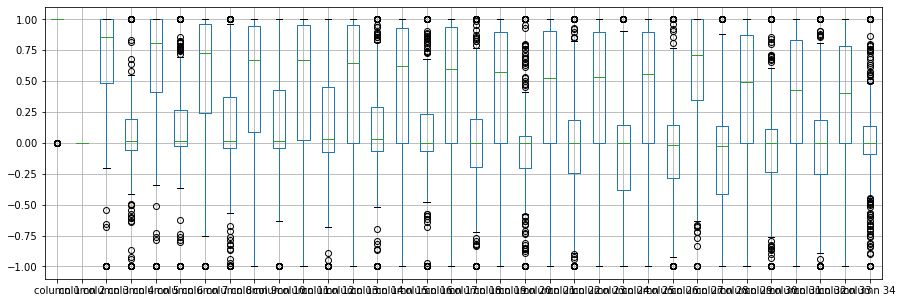

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.892977
column 2     0.000000
column 3     0.648996
column 4     0.052757
column 5     0.601068
column 6     0.104908
column 7     0.553561
column 8     0.122949
column 9     0.505853
column 10    0.167160
column 11    0.476183
column 12    0.153656
column 13    0.418599
column 14    0.089648
column 15    0.364836
column 16    0.054140
column 17    0.394407
column 18    0.007408
column 19    0.359390
column 20   -0.045394
column 21    0.350268
column 22    0.008296
column 23    0.368511
column 24   -0.066767
column 25    0.406629
column 26   -0.065839
column 27    0.565379
column 28   -0.084435
column 29    0.393633
column 30   -0.034632
column 31    0.349413
column 32   -0.017875
column 33    0.345171
column 34    0.026197
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.291713,0.002390,0.111779,0.119529,0.245405,0.034733,0.107601,-0.026581,...,-0.093354,0.082584,-0.148908,0.028015,0.111721,-0.140583,0.140108,-0.022338,0.127270,0.021900
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.291713,NaN,1.000000,0.145606,0.488159,0.066321,0.355946,0.046633,0.435541,0.068920,...,0.258090,-0.095755,0.054910,0.262118,0.321964,0.063195,0.306505,0.005657,0.348523,0.040342
column 4,0.002390,NaN,0.145606,1.000000,0.016229,-0.146350,-0.066723,0.156951,-0.269087,0.184325,...,-0.069932,-0.234830,-0.113676,0.057153,-0.150790,0.336762,-0.143178,-0.094323,-0.074824,0.041462
column 5,0.111779,NaN,0.488159,0.016229,1.000000,0.101953,0.582877,-0.045713,0.450026,-0.039294,...,0.270184,-0.031853,0.139754,0.238753,0.217792,0.046044,0.426672,0.010739,0.418081,-0.123453
column 6,0.119529,NaN,0.066321,-0.146350,0.101953,1.000000,0.082331,0.253552,-0.093146,0.262227,...,-0.186954,0.030858,-0.201061,-0.007100,0.015369,-0.180371,-0.067093,0.259121,0.096332,0.078030
column 7,0.245405,NaN,0.355946,-0.066723,0.582877,0.082331,1.000000,-0.140683,0.437144,-0.091473,...,0.268679,0.054180,0.149742,0.177891,0.303522,0.007460,0.395657,-0.070727,0.566906,-0.107840
column 8,0.034733,NaN,0.046633,0.156951,-0.045713,0.253552,-0.140683,1.000000,-0.316857,0.298332,...,-0.166162,-0.138370,-0.262598,0.056457,-0.171816,0.061542,-0.152941,0.179922,-0.244368,0.382743
column 9,0.107601,NaN,0.435541,-0.269087,0.450026,-0.093146,0.437144,-0.316857,1.000000,-0.214614,...,0.365182,0.091193,0.181469,0.152901,0.298613,-0.043555,0.311146,-0.072660,0.357055,-0.097016
column 10,-0.026581,NaN,0.068920,0.184325,-0.039294,0.262227,-0.091473,0.298332,-0.214614,1.000000,...,-0.284404,-0.076298,-0.206808,0.016872,-0.189227,-0.049813,-0.285096,0.006685,-0.148152,0.073492


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+48,34+48+48,34+48+48+48,34+48+48+48+48,34+48+48+48,34+48+48,34+48,34], vae_layer = False, seed = 480)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.091703460330056
Epoch: 1 , loss: 18.026699701944988
Epoch: 2 , loss: 18.038307326180593
Epoch: 3 , loss: 17.915868168785458
Epoch: 4 , loss: 17.86790943145752
Epoch: 5 , loss: 17.908091454278853
Epoch: 6 , loss: 17.924679074968612
Epoch: 7 , loss: 17.791404951186408
Epoch: 8 , loss: 17.684774171738397
Epoch: 9 , loss: 17.488642329261417
Epoch: 10 , loss: 17.22584510984875
Epoch: 11 , loss: 16.658531416030158
Epoch: 12 , loss: 16.202619915916806
Epoch: 13 , loss: 15.853526660374232
Epoch: 14 , loss: 15.743955521356492
Epoch: 15 , loss: 15.754158973693848
Epoch: 16 , loss: 15.62889017377581
Epoch: 17 , loss: 15.503784088861375
Epoch: 18 , loss: 15.636706851777577
Epoch: 19 , loss: 15.55861032576788
Epoch: 20 , loss: 15.467853818620954
Epoch: 21 , loss: 15.455968448093959
Epoch: 22 , loss: 15.365725835164389
Epoch: 23 , loss: 15.283364114307222
Epoch: 24 , loss: 15.371727171398344
Epoch: 25 , loss: 15.

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3    -0.065067
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -0.080549
column 10    0.026433
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16   -1.000000
column 17   -1.000000
column 18    0.007029
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24   -0.008372
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32   -0.006537
column 33   -0.061826
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,-0.001049,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.495846,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,-0.747286,0.000000,0.0,0.0,0.0,0.0,-0.733642,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0.000000,-0.000916,0.000000,0.449159,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,-0.784045,0.000000,0.0,-1.002439,0.527960,0.0
4,0.000000,0.000000,-0.356606,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.396561,0.075096,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.527299,0.0
347,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,-0.083444,0.0,0.000000,0.000000,0.0
348,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
349,-0.459064,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

20.46550523279382

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.29894032460554276

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     0.889347
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.987620
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.877002
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,-0.001049,0.995390,-0.058890,0.85243,0.02306,0.83398,-0.37708,1.000000,0.037600,...,0.56811,-0.015864,0.41078,-0.46168,0.212660,-0.340900,0.42267,-0.544870,0.186410,-0.45300
1,1.000000,0.000000,0.252714,-0.188290,0.93035,-0.36156,-0.10868,-0.93597,0.266358,-0.045490,...,-0.20332,-0.265690,-0.20468,-0.18401,-0.190400,-0.115930,-0.16626,-0.062880,-0.137380,-0.02447
2,1.000000,0.000000,1.000000,-0.033650,1.00000,0.00485,1.00000,-0.12062,0.889650,0.011980,...,0.57528,-0.402200,0.58984,-0.22145,0.431000,-0.173650,0.60436,-0.241800,0.560450,-0.38238
3,1.000000,-0.000916,1.000000,-0.002451,1.00000,1.00000,0.71216,-1.00000,0.000000,0.000000,...,1.00000,0.906950,0.51613,1.00000,0.215955,-0.200990,0.25682,-0.002439,0.204140,1.00000
4,1.000000,0.000000,0.643394,-0.024010,0.94140,0.06531,0.92106,-0.23255,0.771520,-0.163990,...,0.03286,-0.651580,0.13290,-0.53206,0.024310,-0.621970,-0.05707,-0.595730,-0.046080,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.000000,0.000000,0.835080,0.082980,0.73739,-0.14706,0.84349,-0.05567,0.507849,0.028876,...,0.95378,-0.042020,0.83479,0.00123,1.000000,0.128150,0.86660,-0.107140,0.378161,-0.04307
347,1.000000,0.000000,0.951130,0.004190,0.95183,-0.02723,0.93438,-0.01920,0.945900,0.016060,...,0.94520,0.013610,0.93522,0.04925,0.931590,-0.001764,0.94066,-0.000350,0.914830,0.04712
348,1.000000,0.000000,0.947010,-0.000340,0.93207,-0.03227,0.95177,-0.03431,0.955840,0.024460,...,0.93988,0.031930,0.92489,0.02542,0.921200,0.022420,0.92459,0.004420,0.926970,-0.00577
349,0.540936,0.000000,0.906080,-0.016570,0.98122,-0.01989,0.95691,-0.03646,0.857460,0.001100,...,0.91050,-0.020990,0.89147,-0.07760,0.829830,-0.172380,0.96022,-0.037570,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NE_10(imp).xlsx", index=False, header=False)